In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df= pd.read_excel('cars.xls',encoding='latin-1')

In [77]:
df.shape

(804, 12)

In [78]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [79]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [80]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [81]:
data.describe()

,price,miles,engV,year,Age
count,9023.000000,9023.000000,8701.000000,9023.000000,9023.000000
mean,15686.921183,139.403524,2.588640,2006.619639,12.380361
std,24201.595244,98.251834,5.428071,7.003076,7.003076
min,0.000000,0.000000,0.100000,1953.000000,3.000000
25%,5000.000000,70.000000,1.600000,2004.000000,7.000000
50%,9250.000000,128.000000,2.000000,2008.000000,11.000000
75%,16700.000000,195.000000,2.500000,2012.000000,15.000000
max,547800.000000,999.000000,99.990000,2016.000000,66.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


# Visualize Data

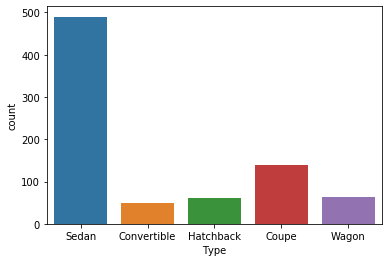

In [83]:
sns.countplot(df['Type'])

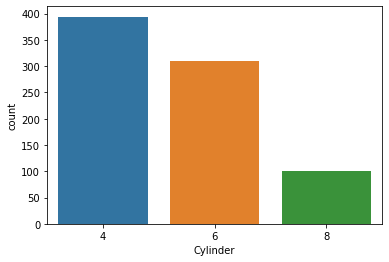

In [84]:
sns.countplot(df['Cylinder'])

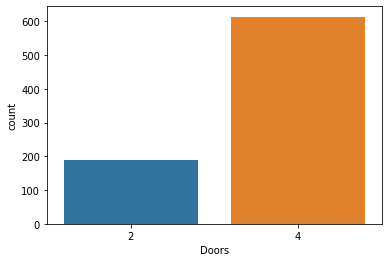

In [85]:
sns.countplot(df['Doors'])

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


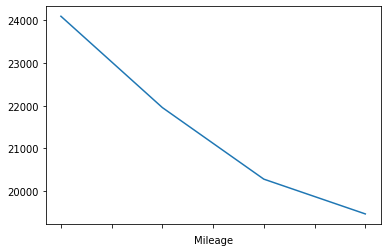

In [86]:
%matplotlib inline
import numpy as np
df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups.head())
groups['Price'].plot.line()

We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [87]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

print (X)

est = sm.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder     Doors
0   -1.417485   0.52741  0.556279
1   -1.305902   0.52741  0.556279
2   -0.810128   0.52741  0.556279
3   -0.426058   0.52741  0.556279
4    0.000008   0.52741  0.556279
..        ...       ...       ...
799 -0.439853   0.52741  0.556279
800 -0.089966   0.52741  0.556279
801  0.079605   0.52741  0.556279
802  0.750446   0.52741  0.556279
803  1.932565   0.52741  0.556279

[804 rows x 3 columns]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.064
Model:                            OLS   Adj. R-squared (uncentered):              0.060
Method:                 Least Squares   F-statistic:                              18.11
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    2.23e-11
Time:                        13:27:24   Log-Likelihood:                         -9207.1
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     801   BIC:                                  1.843e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1272.3412    804.623     -1.581      0.114   -2851.759     307.077
Cylinder    5587.4472    804.509      6.945      0.000    4008.252    7166.642
Doors      -1404.5513    804.275     -1.746      0.081   -2983.288     174.185
==============================================================================
Omnibus:                      157.913   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.529
Skew:                           1.278   Prob(JB):                     1.20e-56
Kurtosis:                       4.074   Cond. No.                         1.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors

In [88]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.



In [89]:
scaled = scale.transform([[45000, 8, 4]])
print(scaled)
predicted = est.predict(scaled[0])
print(predicted)

[[3.07256589 1.96971667 0.55627894]]
[6315.01330583]


# Linear Regression

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

#Evaluation
print('Train score:', lr.score(X_train, y_train))
print('Test score: ', lr.score(X_test, y_test))



Train score: 0.37920939903334416
Test score:  0.2924937294352251


Low train and test scores shows underfitting of the model

In [92]:
from sklearn.neighbors import KNeighborsRegressor

train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

#  K Neighbors Regressor

In [93]:
knn_reg = KNeighborsRegressor(9)
knn_reg.fit(X_train, y_train)


#cross validation
scores = cross_val_score(knn_reg, X_train, y_train)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

scores = cross_val_score(knn_reg, X_test, y_test)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))

Cross-validation train_scores: [0.48362632 0.41630525 0.47222131 0.4767875  0.39639335]
Average cross-validation train_scores: 0.45
Cross-validation test_scores: [0.20825422 0.40360784 0.26519587 0.3860197  0.31043889]
Average cross-validation train_scores: 0.31


In [94]:
#Evaluation
print('Train score:', knn_reg.score(X_train, y_train))
print('Test score: ', knn_reg.score(X_test, y_test))

Train score: 0.5642758159341187
Test score:  0.408324781115442


Text(0, 0.5, 'Accuracy (score)')

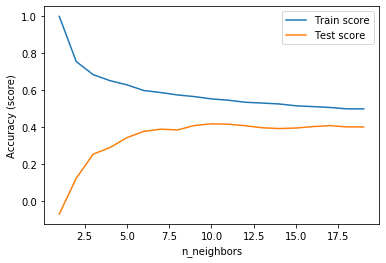

In [95]:
%matplotlib inline

x_axis = range(1,20)
plt.plot(x_axis, train_score, label = 'Train score')
plt.plot(x_axis, test_score, label = 'Test score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy (score)')